In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import json
import requests

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
# Run the following Jupyter Notebooks first
%run data_source.ipynb
%run inflation.ipynb
%run productivity.ipynb
%run jobs.ipynb
%run housing.ipynb

Stored 'inflation_change_df' (DataFrame)
Stored 'productivity_index_monthly_data' (DataFrame)
Stored 'gdp_monthly_data' (DataFrame)
Avg. Median Income Change:-  0.6893301036556077
New Datapoint:-  75094.10239130635
Stored 'jobs_index_change_df' (DataFrame)
Stored 'housing_monthly_data' (DataFrame)


# Inflation

In [3]:
# View Inflation Data
inflation_change_df

,Date,Overall Inflation Index,Monthly Change in Inflation Index (%),Inflation Change in Velocity (basis points)
0,1959-01-01,0.000686,NaN,NaN
1,1959-02-01,0.000732,6.262029,NaN
2,1959-03-01,0.000749,2.376992,-388.503682
3,1959-04-01,0.000913,17.897456,1552.046458
4,1959-05-01,0.001040,12.268630,-562.882680
...,...,...,...,...
773,2023-06-01,0.947398,0.226790,65.911579
774,2023-07-01,0.950052,0.279385,5.259543
775,2023-08-01,0.959447,0.979231,69.984609
776,2023-09-01,0.964861,0.561064,-41.816751


# Productivity

In [4]:
# View Productivity Data. Notice that the data is lagging. For this reason, we will use only the GDP number for productivity.
productivity_index_monthly_data

,Date,Overall Productivity Index,Change in Productivity Index (%),Productivity Change in Velocity (basis points)
0,1966-01-01,0.119600,NaN,NaN
1,1966-02-01,0.119600,NaN,NaN
2,1966-03-01,0.119600,NaN,NaN
3,1966-04-01,0.121922,1.904611,NaN
4,1966-05-01,0.121922,1.904611,NaN
...,...,...,...,...
688,2023-05-01,0.742139,0.479013,-79.665286
689,2023-06-01,0.742139,0.479013,-79.665286
690,2023-07-01,0.760044,2.355768,187.675499
691,2023-08-01,0.760044,2.355768,187.675499


In [5]:
# Decided to just use the GDP data only for productivity
gdp_monthly_data

,Date,Overall Productivity Index,Change in GDP (%),GDP Change in Velocity (basis points)
0,1947-01-01,243.164,NaN,NaN
1,1947-02-01,243.164,NaN,NaN
2,1947-03-01,243.164,NaN,NaN
3,1947-04-01,245.968,1.139986,NaN
4,1947-05-01,245.968,1.139986,NaN
...,...,...,...,...
916,2023-05-01,27063.012,0.921594,-58.956481
917,2023-06-01,27063.012,0.921594,-58.956481
918,2023-07-01,27644.463,2.103318,118.172447
919,2023-08-01,27644.463,2.103318,118.172447


# Jobs

In [6]:
# View Jobs Data
jobs_index_change_df

,Date,Overall Jobs Index,Monthly Change in Jobs Index (%),Jobs Index Change in Velocity (basis points)
0,1984-01-01,0.454794,NaN,NaN
1,1984-02-01,0.471976,3.640625,NaN
2,1984-03-01,0.471976,0.000000,-364.062500
3,1984-04-01,0.484735,2.631979,263.197931
4,1984-05-01,0.506342,4.267405,163.542529
...,...,...,...,...
473,2023-06-01,0.765919,0.577709,232.090468
474,2023-07-01,0.770344,0.574390,-0.331830
475,2023-08-01,0.765403,-0.645543,-121.993316
476,2023-09-01,0.765403,0.000000,64.554294


# Housing

In [7]:
# View Housing Data. Notice that the data is lagging. For this reason, we will use a 12 month moving average to bring the data to latest date that will align with other dataframes.
housing_monthly_data

,Date,Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points)
0,1987-04-01,0.522811,NaN,NaN
1,1987-05-01,0.522811,NaN,NaN
2,1987-06-01,0.522811,NaN,NaN
3,1987-07-01,0.521839,-0.186205,NaN
4,1987-08-01,0.521839,-0.186205,NaN
...,...,...,...,...
433,2023-05-01,0.966971,4.439127,488.761490
434,2023-06-01,0.966971,4.439127,488.761490
435,2023-07-01,0.980007,1.330167,-310.895974
436,2023-08-01,0.980007,1.330167,-310.895974


In [8]:
updated_housing_monthly_data = pd.DataFrame()

dates_list = list(housing_monthly_data["Date"])
i_list = list(housing_monthly_data["Overall Housing Index"])[-12:]

change_list = list(housing_monthly_data["Change in Overall Housing Index (%)"])

# last_change = list(housing_monthly_data["Housing Change in Velocity (basis points)"])[-1]
velocity_list = []

for i in range(5):
    # New Dates
    dates_list.append(dates_list[-1] + pd.DateOffset(months=1))
    
    # Index Averages to add
    avg = sum(i_list[-12:]) / 12
    
    # Change (%) 
    change = ((avg - i_list[-1]) / i_list[-1]) * 100  
    i_list.append(avg)
    
    # Velocity
    velocity = (change - change_list[-1]) * 100
    
    change_list.append(change)
    velocity_list.append(velocity)
        

fabricated_index_list = i_list[-5:]

updated_housing_monthly_data["Date"] = dates_list

indexes = list(housing_monthly_data["Overall Housing Index"]) + fabricated_index_list
updated_housing_monthly_data["Overall Housing Index"] = indexes

changes = list(housing_monthly_data["Change in Overall Housing Index (%)"]) + change_list

updated_housing_monthly_data["Change in Overall Housing Index (%)"] = change_list

      
velocities = list(housing_monthly_data["Housing Change in Velocity (basis points)"]) + velocity_list
updated_housing_monthly_data["Housing Change in Velocity (basis points)"] = velocities


updated_housing_monthly_data.tail(12)

,Date,Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points)
431,2023-03-01,0.924046,-0.448488,259.878876
432,2023-04-01,0.966971,4.439127,488.761490
433,2023-05-01,0.966971,4.439127,488.761490
434,2023-06-01,0.966971,4.439127,488.761490
435,2023-07-01,0.980007,1.330167,-310.895974
436,2023-08-01,0.980007,1.330167,-310.895974
437,2023-09-01,0.980007,1.330167,-310.895974
438,2023-10-01,0.949803,-3.081945,-441.211260
439,2023-11-01,0.951605,0.189630,327.157491
440,2023-12-01,0.953556,0.205043,1.541364


# Interest Rate

In [9]:
# GS10 - Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity. This will be used to gauge rates
interest_rate_df = pd.DataFrame(fred_api_function("GS10"))

# Rename the 'Value' column to '10-Year Real Interest Rate'
interest_rate_df.rename(columns={'Value': '10-Year Treasury Yield'}, inplace=True)

interest_rate_df["10-Yr Yield (basis points)"] = interest_rate_df["10-Year Treasury Yield"] * 100

interest_rate_df

,Date,10-Year Treasury Yield,10-Yr Yield (basis points)
0,1953-04-01,2.83,283.0
1,1953-05-01,3.05,305.0
2,1953-06-01,3.11,311.0
3,1953-07-01,2.93,293.0
4,1953-08-01,2.95,295.0
...,...,...,...
843,2023-07-01,3.90,390.0
844,2023-08-01,4.17,417.0
845,2023-09-01,4.38,438.0
846,2023-10-01,4.80,480.0


In [10]:
# Convert Dates to the appropriate data type
inflation_change_df["Date"] = pd.to_datetime(inflation_change_df["Date"])
gdp_monthly_data["Date"] = pd.to_datetime(gdp_monthly_data["Date"])
jobs_index_change_df["Date"] = pd.to_datetime(jobs_index_change_df["Date"])
updated_housing_monthly_data["Date"] = pd.to_datetime(updated_housing_monthly_data["Date"])
interest_rate_df["Date"] = pd.to_datetime(interest_rate_df["Date"])

In [11]:
# Merge the DataFrames
combined_df = pd.DataFrame()

# Merge Inflation and Productivity DataFrames on the 'Date' column
combined_df = pd.merge(inflation_change_df, gdp_monthly_data, on='Date')

# Merge Combined DataFrames to Jobs DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, jobs_index_change_df, on='Date')

# Merge Combined DataFrames to Housing DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, updated_housing_monthly_data, on='Date')

# Merge Combined DataFrames to Interest Rate DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, interest_rate_df, on='Date')

combined_df

,Date,Overall Inflation Index,Monthly Change in Inflation Index (%),Inflation Change in Velocity (basis points),Overall Productivity Index,Change in GDP (%),GDP Change in Velocity (basis points),Overall Jobs Index,Monthly Change in Jobs Index (%),Jobs Index Change in Velocity (basis points),Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points),10-Year Treasury Yield,10-Yr Yield (basis points)
0,1987-04-01,0.247756,0.837615,45.520270,4806.160,1.747840,38.132464,0.629590,1.446604,144.660389,0.522811,NaN,NaN,8.02,802.0
1,1987-05-01,0.249359,0.642805,-19.480951,4806.160,1.747840,38.132464,0.642090,1.946768,50.016450,0.522811,NaN,NaN,8.61,861.0
2,1987-06-01,0.250934,0.627828,-1.497712,4806.160,1.747840,38.132464,0.638181,-0.612452,-255.922056,0.522811,NaN,NaN,8.40,840.0
3,1987-07-01,0.252414,0.586484,-4.134358,4884.555,1.604957,-14.288342,0.646773,1.328356,194.080855,0.521839,-0.186205,NaN,8.45,845.0
4,1987-08-01,0.254018,0.631408,4.492308,4884.555,1.604957,-14.288342,0.655364,1.310942,-1.741399,0.521839,-0.186205,NaN,8.76,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-05-01,0.945249,-0.432326,-67.040986,27063.012,0.921594,-58.956481,0.761494,-1.743196,-231.430598,0.966971,4.439127,488.761490,3.57,357.0
434,2023-06-01,0.947398,0.226790,65.911579,27063.012,0.921594,-58.956481,0.765919,0.577709,232.090468,0.966971,4.439127,488.761490,3.75,375.0
435,2023-07-01,0.950052,0.279385,5.259543,27644.463,2.103318,118.172447,0.770344,0.574390,-0.331830,0.980007,1.330167,-310.895974,3.90,390.0
436,2023-08-01,0.959447,0.979231,69.984609,27644.463,2.103318,118.172447,0.765403,-0.645543,-121.993316,0.980007,1.330167,-310.895974,4.17,417.0


In [12]:
# Reduce columns of the DataFrame to only the relevant columns

selected_columns = ["Date", "Inflation Change in Velocity (basis points)", "GDP Change in Velocity (basis points)", \
                   "Jobs Index Change in Velocity (basis points)", "Housing Change in Velocity (basis points)", \
                   "10-Yr Yield (basis points)"]


reduced_df = combined_df[selected_columns]

reduced_df

,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points)
0,1987-04-01,45.520270,38.132464,144.660389,NaN,802.0
1,1987-05-01,-19.480951,38.132464,50.016450,NaN,861.0
2,1987-06-01,-1.497712,38.132464,-255.922056,NaN,840.0
3,1987-07-01,-4.134358,-14.288342,194.080855,NaN,845.0
4,1987-08-01,4.492308,-14.288342,-1.741399,NaN,876.0
...,...,...,...,...,...,...
433,2023-05-01,-67.040986,-58.956481,-231.430598,488.761490,357.0
434,2023-06-01,65.911579,-58.956481,232.090468,488.761490,375.0
435,2023-07-01,5.259543,118.172447,-0.331830,-310.895974,390.0
436,2023-08-01,69.984609,118.172447,-121.993316,-310.895974,417.0


In [13]:
# Lock or Float Historical Lock/Float Best Decisions
yield_list = reduced_df["10-Yr Yield (basis points)"]

lock_yn_list = []

def generate_lock_decisions(yields):
    # Initialize an empty list to store the output
    output = []

    # Iterate through the yields starting from the second element
    for i in range(0, len(yields)):
        try:
            # Check if the current yield is higher than the previous one
            if yields[i] < yields[i + 1]:
                output.append(1)
            else:
                output.append(0)
        except:
            output.append("predict this")

    return output

lock_yn_list = generate_lock_decisions(yield_list)

reduced_df["lock_yn"] = lock_yn_list

# Notice the "predict this" on the last row to remind us to what decision we are trying to determine
reduced_df

C:\Users\deepe\AppData\Local\Temp\ipykernel_7456\428527774.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
0,1987-04-01,45.520270,38.132464,144.660389,NaN,802.0,1
1,1987-05-01,-19.480951,38.132464,50.016450,NaN,861.0,0
2,1987-06-01,-1.497712,38.132464,-255.922056,NaN,840.0,1
3,1987-07-01,-4.134358,-14.288342,194.080855,NaN,845.0,1
4,1987-08-01,4.492308,-14.288342,-1.741399,NaN,876.0,1
...,...,...,...,...,...,...,...
433,2023-05-01,-67.040986,-58.956481,-231.430598,488.761490,357.0,1
434,2023-06-01,65.911579,-58.956481,232.090468,488.761490,375.0,1
435,2023-07-01,5.259543,118.172447,-0.331830,-310.895974,390.0,1
436,2023-08-01,69.984609,118.172447,-121.993316,-310.895974,417.0,1


In [14]:
# # Drop N/As in the top 6 rows
dropped_df = reduced_df.iloc[6:]
dropped_df

,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
6,1987-10-01,35.002992,85.988237,119.636698,71.621589,952.0,0
7,1987-11-01,-13.672016,85.988237,73.594164,71.621589,886.0,1
8,1987-12-01,-2.006025,85.988237,-67.057645,71.621589,899.0,0
9,1988-01-01,39.081656,-117.618938,57.289325,-40.312646,867.0,0
10,1988-02-01,-40.778699,-117.618938,-62.295450,-40.312646,821.0,1
...,...,...,...,...,...,...,...
433,2023-05-01,-67.040986,-58.956481,-231.430598,488.761490,357.0,1
434,2023-06-01,65.911579,-58.956481,232.090468,488.761490,375.0,1
435,2023-07-01,5.259543,118.172447,-0.331830,-310.895974,390.0,1
436,2023-08-01,69.984609,118.172447,-121.993316,-310.895974,417.0,1


In [15]:
# Drop Last Row to start building the ML model
dropped_last_row_df = dropped_df.iloc[:-1]
dropped_last_row_df
# Drop first column to remove time as an input variable
dropped_first_column_df = dropped_last_row_df.iloc[:, 1:]
dropped_first_column_df



,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
6,35.002992,85.988237,119.636698,71.621589,952.0,0
7,-13.672016,85.988237,73.594164,71.621589,886.0,1
8,-2.006025,85.988237,-67.057645,71.621589,899.0,0
9,39.081656,-117.618938,57.289325,-40.312646,867.0,0
10,-40.778699,-117.618938,-62.295450,-40.312646,821.0,1
...,...,...,...,...,...,...
432,51.625244,-58.956481,-54.416452,488.761490,346.0,1
433,-67.040986,-58.956481,-231.430598,488.761490,357.0,1
434,65.911579,-58.956481,232.090468,488.761490,375.0,1
435,5.259543,118.172447,-0.331830,-310.895974,390.0,1


In [16]:
# Features Data
features = dropped_first_column_df.iloc[:, :-1]
features_data_matrix = features.values
print("Length of Features List:  " , len(features_data_matrix))

# Decision Labels
labels = dropped_first_column_df.iloc[:, -1]
labels_data = labels.values.astype(int)
print("Length of Labels List:  " , len(labels_data))

Length of Features List:   431
Length of Labels List:   431


In [17]:
features_data_matrix

array([[ 3.50029920e+01,  8.59882366e+01,  1.19636698e+02,
         7.16215891e+01,  9.52000000e+02],
       [-1.36720159e+01,  8.59882366e+01,  7.35941639e+01,
         7.16215891e+01,  8.86000000e+02],
       [-2.00602538e+00,  8.59882366e+01, -6.70576445e+01,
         7.16215891e+01,  8.99000000e+02],
       ...,
       [ 6.59115785e+01, -5.89564811e+01,  2.32090468e+02,
         4.88761490e+02,  3.75000000e+02],
       [ 5.25954264e+00,  1.18172447e+02, -3.31830125e-01,
        -3.10895974e+02,  3.90000000e+02],
       [ 6.99846092e+01,  1.18172447e+02, -1.21993316e+02,
        -3.10895974e+02,  4.17000000e+02]])

In [18]:
labels_data

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

Determine Independent variables (X) and Dependent variables (y). Then split the data into train and test data

In [31]:
from sklearn.model_selection import train_test_split
X = features_data_matrix
y = labels_data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True, test_size=0.2)
print(X.shape, y.shape)

(431, 5) (431,)


# KNN

k: 1, Train/Test Score: 1.000/0.517
k: 3, Train/Test Score: 0.767/0.517
k: 5, Train/Test Score: 0.709/0.563
k: 7, Train/Test Score: 0.660/0.609
k: 9, Train/Test Score: 0.663/0.506
k: 11, Train/Test Score: 0.642/0.586
k: 13, Train/Test Score: 0.648/0.609
k: 15, Train/Test Score: 0.613/0.563
k: 17, Train/Test Score: 0.590/0.586
k: 19, Train/Test Score: 0.578/0.621


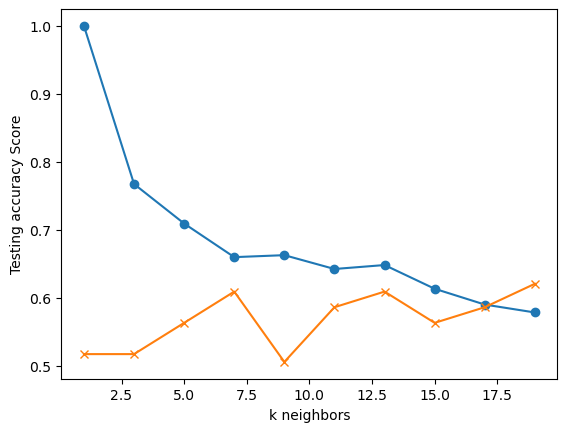

In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test, y_test))

k=19 Test Acc: 0.621


In [34]:
# How would the knn score?
knn.score(X_test, y_test)

0.6206896551724138

In [35]:
# Enter the new independent variables to predict decision
new_data = np.array([[-42.802841, 118.172447, 64.554294, -1.073848, 438.0 ]])
new_data

array([[-42.802841, 118.172447,  64.554294,  -1.073848, 438.      ]])

In [36]:
predicted_class = knn.predict(new_data)
print(predicted_class)

[0]
